PROBLEM STATEMENT

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica!

Origin of this data : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, 
Antarctica LTER, a member of the Long Term Ecological Research Network.

The dataset consists of 5 columns.

culmen_length_mm: culmen length (mm)

culmen_depth_mm: culmen depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g: body mass (g)

sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species 
that are native to the region: Adelie, Chinstrap, and Gentoo, so your task is to apply your data science skills to help them 
identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("C:\Meet\Projects\Project_3_Clustering Antarctic Penguin Species\data\penguins.csv")
penguins_df.head()

<>:9: SyntaxWarning: invalid escape sequence '\M'
<>:9: SyntaxWarning: invalid escape sequence '\M'
C:\Users\meetb\AppData\Local\Temp\ipykernel_60940\1375572778.py:9: SyntaxWarning: invalid escape sequence '\M'
  penguins_df = pd.read_csv("C:\Meet\Projects\Project_3_Clustering Antarctic Penguin Species\data\penguins.csv")


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


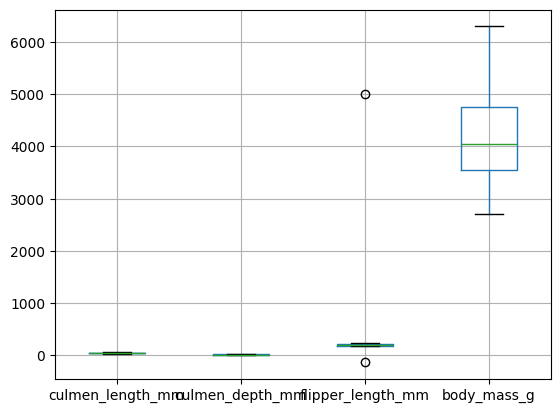

In [2]:
#Identifying Null values in the dataset
print(penguins_df.isna().sum().sort_values())
penguins_df.boxplot()
plt.show()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


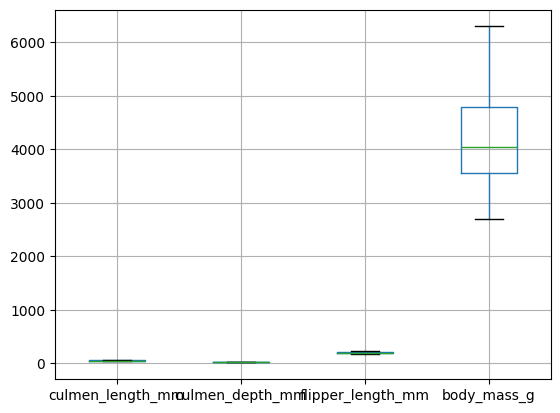

In [3]:
#Removing the null values
penguins_clean = penguins_df.dropna()

#Removing the outliers
penguins_clean = penguins_clean[(penguins_clean["flipper_length_mm"] < 1000) & (penguins_clean["flipper_length_mm"] > 0)]

#Checking for null values and ourliers
print(penguins_clean.isna().sum().sort_values())
penguins_clean.boxplot()
plt.show()

In [4]:
#Converting the Sex dataset from Categorical to Numerical data
penguins_encoded = pd.get_dummies(penguins_clean['sex'], drop_first=True)  
penguins_combined = pd.concat([penguins_clean.drop(columns=['sex']), penguins_encoded], axis=1)
penguins_combined.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [5]:
print(penguins_combined.dtypes)

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
FEMALE                  bool
MALE                    bool
dtype: object


In [6]:
# PREPROCESSING THE DATA
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_combined)

In [7]:
# PERFORMING PCA
pca = PCA()
pca.fit(penguins_preprocessed)

# Calculating the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

#Detecting the number of components with more than 10% explained variance ratio and storing the calue in n_components
n_components = (explained_variance_ratio > 0.1).sum()

#Running PCA again, optimally with specified n_components
pca_optimal = PCA(n_components = n_components)
pca_optimal.fit(penguins_preprocessed)
penguins_PCA = pca_optimal.transform(penguins_preprocessed)


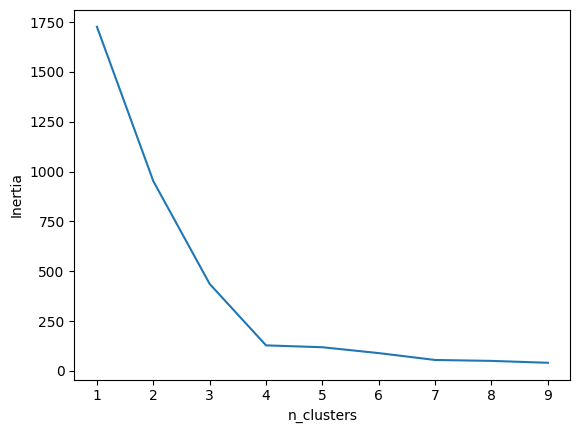

In [8]:
# DETECTING THE OPTIMAL NUMBER OF CLUSTERS

# Empty list to store the Inertia
Inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42).fit(penguins_PCA)
    Inertia.append(kmeans.inertia_)
X = range(1, 10)
y = Inertia
plt.plot(X, y)
plt.xlabel("n_clusters")
plt.ylabel("Inertia")
plt.show()

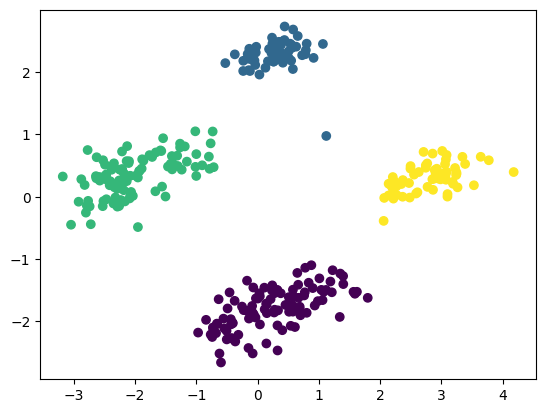

In [9]:
# Saving the optimal number of clusters
n_clusters = 4

# Rerunning the KMeans algorithm for the optimal number of clusters
kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)
plt.show()

In [10]:
# CREATING A FINAL STATISTICAL DATAFRAME FOR EACH CLUSTER
penguins_clean['label'] = kmeans.labels_
# Creating a list containing the names of the numeric columns of penguins_clean DataFrame
numeric_columns = penguins_clean.select_dtypes(include=['number']).columns.tolist()
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
label                                                                      
0             43.878302        19.111321         194.764151  4006.603774   
1             45.545763        14.262712         212.779661  4683.050847   
2             40.217757        17.611215         189.046729  3419.158879   
3             49.473770        15.718033         221.540984  5484.836066   

       label  
label         
0        0.0  
1        1.0  
2        2.0  
3        3.0  
